# Question 1


$$z' = az + by + c$$

$$z = y'$$

$$0< x<1$$

$$z(1) = 1$$
$$y(0) = 0$$

# Question 2

Solving for $y$ we get that

$y(x) = \dfrac{c_1 e^{a x}} {a} + c_2$

And, $z(x) = {c_1 e^{a x}} $

We could use Newton's algorithm to find the solution to the non-linear equation $y(0) =0$ and $z(1) = 0$. Newton iterations have the following form:

$$ c_{n+1} = c_n - f ( c_n )/ f ' ( c_n ) $$

Where $f(c_n) = \begin{bmatrix} a c_1 + c_2 \\ c_1 e^{a}  \end{bmatrix} $ and  $c_n = \begin{bmatrix} c_{1,n} \\ c_{2,n} \end{bmatrix}$ is a vector

# Question 3

We are given the equation 

$-(a(x)y')' + b(x)y' + c(x)y = d(x)$ 

$0<x<1$

$y(0) = 0$ $y'(1) = 0$

The weak formulation of the equation


$$\int_0^1  \left(-(a(x)y')' + b(x)y' + c(x)y + d(x)\right) v(x)dx  $$

Integrating by parts we get that

$$  \int_0^1 \left(-(a(x)y'\right)'  v(x)dx =   \int_0^1 a(x) y' v'(x) dx $$

As a result, the weak variational form is


$$\int_0^1  a(x) y' v'(x) + \left( b(x)y' + c(x)y + d(x)\right) v(x)dx  $$

# Question 4

The weak variational form of this differential equation is given by

$$\int_0^1 (-u'' + u) vdx = \int_0^1 (u'v' + uv) dx $$

By approximating $u = \sum_{i=1}^{N} \alpha_i \phi_i(x) $ and $v = \sum_{j=1}^{N} \beta_j \phi_j(x)$

Leads to the finite approximation given below 

$$\sum_{i=1}^{N} \beta_i \left(\sum_{j=1}^{N} K_{ij} \alpha_j  \right) = 0$$

Where

$$K_{ij} = \int_0^1 \phi'_j(x) \phi_i'(x) + \phi_j(x) \phi_i(x) dx$$


Letting, $\beta_i = 1$ when $i=j$ we get the following set of $j$ equations

$$ \sum_j K_{ij} \alpha_j  = 0$$

In matrix notation this would be $K \alpha = 0 $  where $\alpha$ is a $J \times 1$ row vector and $K$ is the stiffness matrix with elements $K_{ij}$. All that is left to do is to solve for the elements in the stiffness matrix.  The hat function basis is
 
$$ \phi_i(x) = \begin{cases} \dfrac{x-x_{i-1}}{h_i} & x_{i-1} \leq x \leq x_i \\ \dfrac{x_{i+1} - x}{h_{i+1}} & x_i \leq x \leq x_{i+1} \\ 0 & o.w.
\end{cases}$$

The stiffness matrix $K_{ij}$ can be approximated with finite elements. From the hat functions specification, we know that $K$ will be a tridiagonal matrix i.e. outside the tridiagonal elements, $\phi_i =0$ or $\phi_j=0$


$$K_{jj} = \int_{x_{j+1}}^{x_{j-1}} \phi'_j(x) \phi_j'(x) + \phi_j(x) \phi_j(x)  dx = 1/h + h/3$$

$$K_{jj+1} = \int_{x_{j}}^{x_{j+1}} \phi'_j(x) \phi_{j+1}'(x) + \phi_j(x) \phi_{j+1}(x)  dx  =-1/h + h/6$$

$$K_{jj-1} = \int_{x_{j-1}}^{x_j} \phi'_j(x) \phi_{j-1}'(x) + \phi_j(x) \phi_{j-1}(x)  dx = -1/h + h/6$$ 

Combining these results we get the following system of $N$ equations


$$\begin{bmatrix} 1/h + h/3 & -1/h + h/6 & 0 & ... \\  -1/h + h/6 &1/h + h/3 & -1/h + h/6 & 0 &... \\  0 & -1/h + h/6 &1/h + h/3 & -1/h + h/6 & ... \\ ... \end{bmatrix} \begin{bmatrix} \alpha_1 \\ \alpha_2 \\ ... \end{bmatrix} = 0 $$

# Question 5

In [2]:
using LinearAlgebra
using Pkg
using PyPlot
using Distributions
#Pkg.add("NLsolve")
using NLsolve

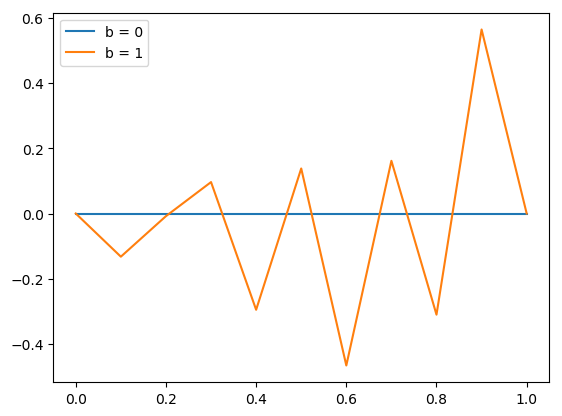

In [3]:
dt =.1
tmin, tmax = 0,1
N = Integer( (tmax-tmin)/h ) 
y_init = 0
pd = Normal()

ts = collect(tmin:h:tmax)
ys = zeros(1,N+1)
ys[1] = y_init

numSims=5
## Computing the Process

b= 0
for b = [0,1]
    for j = 1:numSims
        for i = 2:N
            y = ys[i-1]
            sigma   =  b
            dW      = rand(pd,1)
            ys[i] = ys[i] - y *dt  + sigma * dW[1]
        end
    end

    ys = ys ./ N
    plot(ts, ys[1,:],label="b = $(b)")
end
legend()
show()

# Question 6

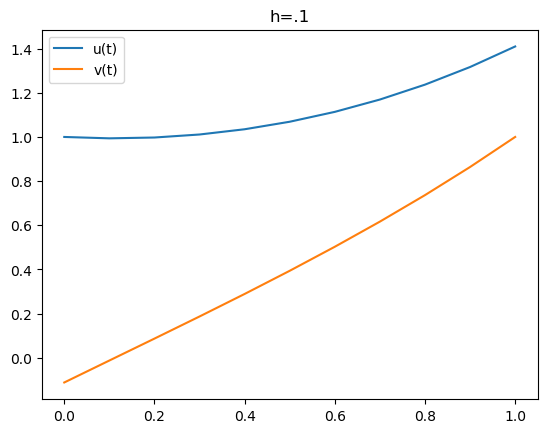

In [12]:
xmin= 0
xmax= 1
f(x) = [x[2],x[1]]



function trajectory(v0,xmin,xmax,h,f)
    N = Integer( (xmax-xmin)/h )
    ys = zeros(2,N+1)
    ts = collect(tmin:h:tmax)
    ys[:,1] = [1, v0]
    for i =1:N
        y_pred = ys[:,i] + h .* f(ys[:,i])
        ys[:,i+1]= ys[:,i] + .5 .* h .* (f(ys[:,i]) + f(y_pred))
    end
    return ys
end


h= .1
#solve for the initial v0 using shooting
eq(x) = 1-trajectory(x[1],xmin,xmax,h,f)[2,end]
v0 = nlsolve(eq,[0.0])
ys1 = trajectory(v0.zero[1],xmin,xmax,h,f)
ts1  = collect(xmin:h:xmax)
plot(ts1,ys1[1,:],label = "u(t)")
plot(ts1,ys1[2,:],label = "v(t)")
title("h=.1")
legend()
show()

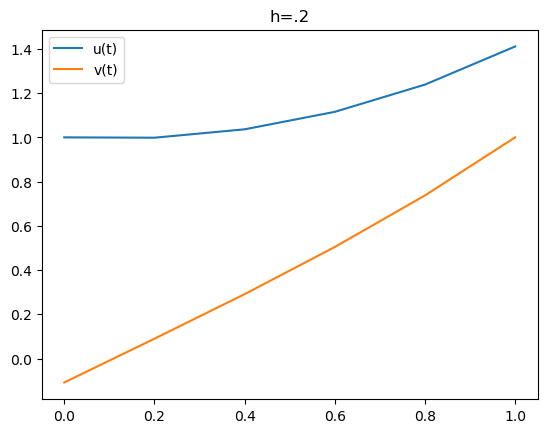

In [13]:
#do the richardson extrapolation
h=.2
#solve for the initial v0 using shooting
eq(x) = 1-trajectory(x[1],xmin,xmax,h,f)[2,end]
v0 = nlsolve(eq,[0.0])
ys2 = trajectory(v0.zero[1],xmin,xmax,h,f)
ts2  = collect(xmin:h:xmax)
plot(ts2,ys2[1,:],label = "u(t)")
plot(ts2,ys2[2,:],label = "v(t)")
title("h=.2")
legend()
show()

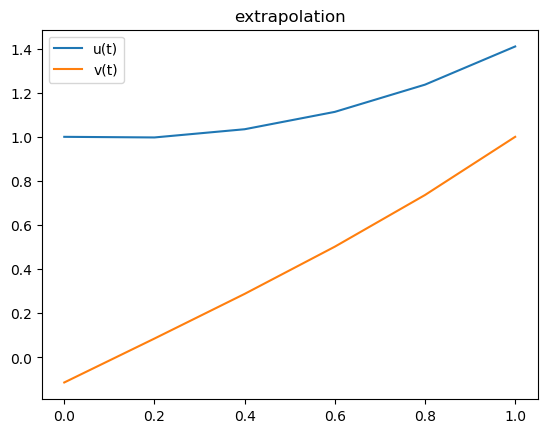

In [28]:
ys_extrap = zeros(size(ys2))


for i=1:size(ys2)[2]
    y_extrap = (4*ys1[:, 2*i-1] - ys2[:,i])/3
    ys_extrap[:,i] = y_extrap
end

plot(ts2,ys_extrap[1,:],label = "u(t)")
plot(ts2,ys_extrap[2,:],label = "v(t)")
title("extrapolation")
legend()
show()

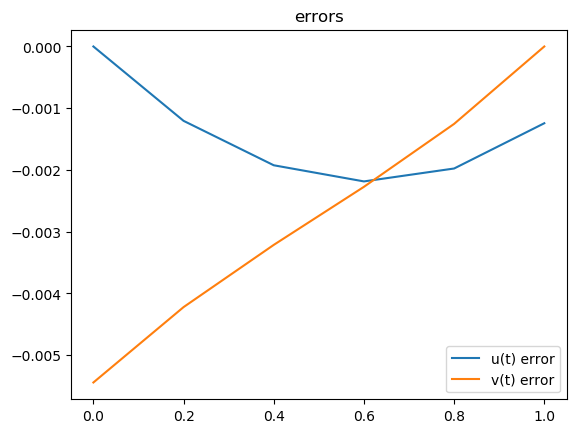

In [30]:
errors = ys_extrap - ys2

plot(ts2,errors[1,:],label = "u(t) error")
plot(ts2,errors[2,:],label = "v(t) error")
title("errors")
legend()
show()